# Importing Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pickle

import PySimpleGUI as sg
import time
from textblob import TextBlob

# Getting My Model

In [2]:
vec = open("NLP.pkl", 'rb')
model = pickle.load(vec)

C:\Users\serap\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
vcb = open("Vocab.pkl", 'rb')
vocab = pickle.load(vcb)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',vocabulary=vocab)

# Functions

In [5]:
def clear_text(text):
    
    text=text.lower()
    text=text.replace("[^\w\s]","")
    text=text.replace("\d+","")
    text=text.replace("\n"," ").replace("\r","")
    
    return text

In [6]:
def vect_text(text):
    return vect.transform([text])

# GUI

In [7]:
sg.theme('DarkBrown4')

'DarkBrown4'

In [8]:
import PySimpleGUI as sg

def main():

    layout = [[sg.Text('Sentiment Analysis', font=('Lucida', 20))],
             [sg.Text('Text: ')],
             [sg.In(justification='center', key='-IN-', enable_events=True, size=(80,80))],
             [sg.Button('Analyze'), sg.Text(size=(25,1), key='-OUTPUT-'), sg.Button('Exit')],
             [sg.Text('BY SERAP', font=('Lucida', 20))]]
    
    window = sg.Window('', layout, element_justification='c')
    while True: # Event Loop
        event, values = window.read()
    
        if event in (sg.WIN_CLOSED, 'Exit'):
            break
        if event == 'Analyze':
            sonuc = model.predict(vect_text(clear_text(values['-IN-'])))
            window['-OUTPUT-'].update(sonuc)
    window.close()
if __name__ == '__main__':
    main()

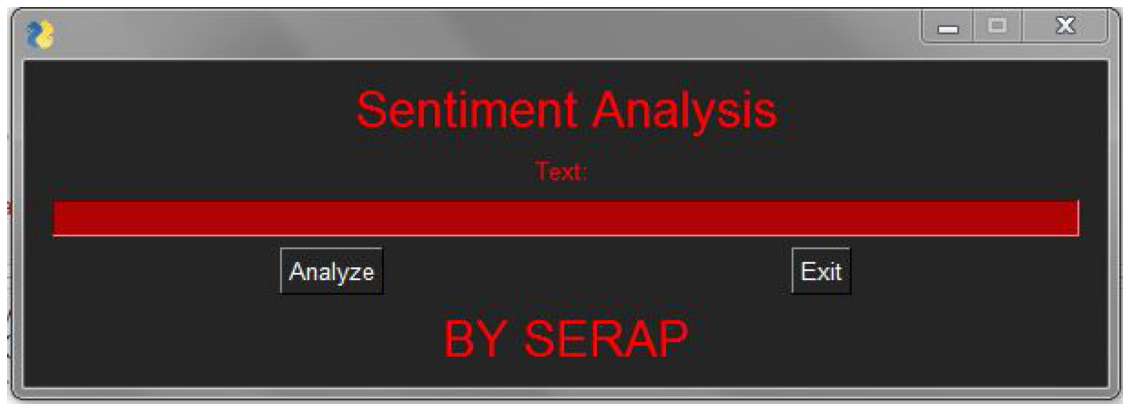

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
img=plt.imread('gui.JPG')
plt.imshow(img)
plt.axis('off')
plt.show()